# 0. Test

## -1. Data preparing

In [30]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta

random.seed(76019367)

In [7]:
file_list = os.listdir('D:/Working_Place/new_uber/data/data_processed')
file_list.remove('.ipynb_checkpoints')
file_list

['y1901.csv',
 'y1902.csv',
 'y1903.csv',
 'y1904.csv',
 'y1905.csv',
 'y1906.csv',
 'y1907.csv',
 'y1908.csv',
 'y1909.csv',
 'y1910.csv',
 'y1911.csv',
 'y1912.csv',
 'y2001.csv',
 'y2002.csv',
 'y2003.csv',
 'y2004.csv',
 'y2005.csv',
 'y2006.csv',
 'y2007.csv',
 'y2008.csv',
 'y2009.csv',
 'y2010.csv',
 'y2011.csv',
 'y2012.csv',
 'y2101.csv',
 'y2102.csv',
 'y2103.csv',
 'y2104.csv',
 'y2105.csv',
 'y2106.csv',
 'y2107.csv',
 'y2108.csv',
 'y2109.csv',
 'y2110.csv',
 'y2111.csv',
 'y2112.csv',
 'y2201.csv',
 'y2202.csv',
 'y2203.csv',
 'y2204.csv',
 'y2205.csv',
 'y2206.csv',
 'y2207.csv',
 'y2208.csv',
 'y2209.csv',
 'y2210.csv',
 'y2211.csv',
 'y2212.csv']

In [17]:
data_samples = []
for file in tqdm(file_list):
    each_data = pd.read_csv('D:/Working_Place/new_uber/data/data_processed/'+file,index_col=0)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [05:31<00:00,  6.90s/it]


In [18]:
data_sample = pd.concat(data_samples)
data_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,average_speed
4004250,2,2019-01-17 15:13:10,2019-01-17 16:19:34,1.0,19.68,1.0,N,231,252,1,58.5,0.0,0.5,0.00,5.76,0.3,65.06,0.0,0.0,17.783133
1138201,2,2019-01-06 10:44:51,2019-01-06 10:56:08,1.0,1.96,1.0,N,68,142,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30,0.0,0.0,10.422452
5165513,1,2019-01-22 15:15:32,2019-01-22 15:23:33,1.0,1.00,1.0,N,263,141,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,0.0,0.0,7.484407
4140154,2,2019-01-17 23:58:28,2019-01-18 00:19:54,1.0,4.35,1.0,N,236,226,2,17.5,0.5,0.5,0.00,0.00,0.3,18.80,0.0,0.0,12.177294
6075414,2,2019-01-25 21:22:49,2019-01-25 21:46:33,1.0,3.27,1.0,N,79,141,1,17.0,0.5,0.5,3.66,0.00,0.3,21.96,0.0,0.0,8.266854


In [19]:
len(data_sample),data_sample.columns

(1592429,
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'average_speed'],
       dtype='object'))

## -2. Tipping behavior according to various factors

In [38]:
data_sample['tpep_pickup_datetime']=data_sample['tpep_pickup_datetime'].apply(lambda x:dt.strptime(x,'%Y-%m-%d %H:%M:%S'))
data_sample['tpep_dropoff_datetime']=data_sample['tpep_dropoff_datetime'].apply(lambda x:dt.strptime(x,'%Y-%m-%d %H:%M:%S'))

<AxesSubplot:xlabel='tpep_pickup_datetime'>

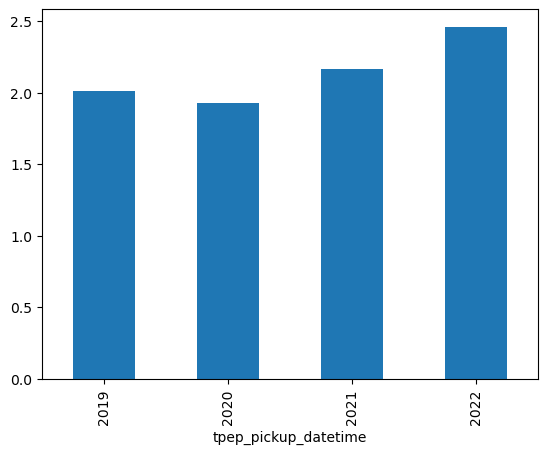

In [49]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.year).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

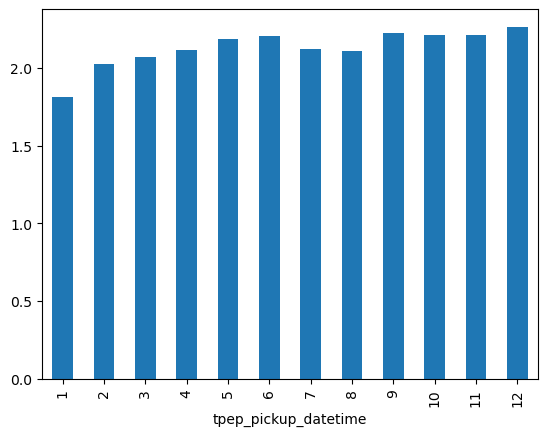

In [50]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.month).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

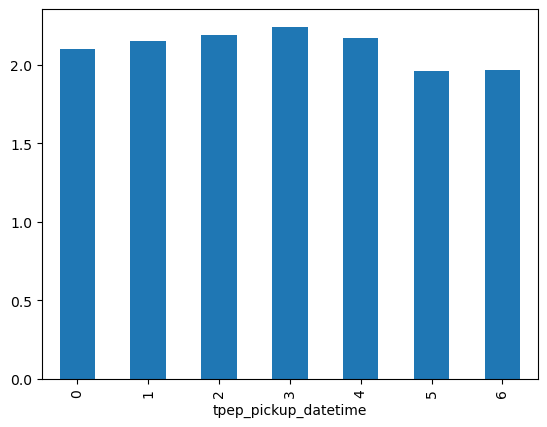

In [52]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.weekday).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

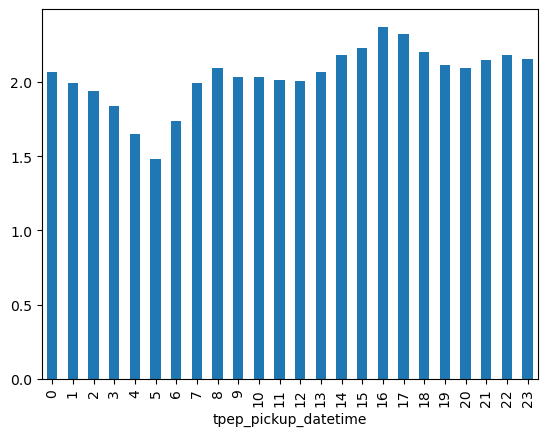

In [55]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.hour).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')